### 워드클라우드

#### 필요한 패키지 불러오기:

In [1]:
#처음엔 설치 필요!
#!pip install wordcloud
from wordcloud import WordCloud
import konlpy
import numpy as np
import pandas as pd
import re, os
import matplotlib.pyplot as plt
from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
%matplotlib inline

#### 데이터 읽어오기:

In [2]:
os.chdir(r"..\data")
f = open("example_seoul_government.txt",'r')
my_text = f.readlines()
f.close()

In [3]:
# 몇개만 출력해 본다.
my_text[:10]

['305 무료법률상담에 대한 부탁의 말씀 입니다. 2014-09-27 2 \n',
 '304 [교통불편접수] 6715 버스(신월동->상암동) 2014-09-26 2 \n',
 '303 경기도 시흥시 아파트 화재~ 2014-09-22 145 \n',
 '302 마곡지구 하자보수 관련 2014-09-22 57 \n',
 '301 가깝고도 먼 강남(성수동에서 압구정역 방면) 2014-09-22 83 \n',
 '300 청담나들목(제외지측)입구 주변지역안내도 정비 필요 2014-09-22 20 \n',
 '299 전 제주도 시민입니다만.. 2014-09-16 2 \n',
 '298 지방자치제 실시로 소요되는 비용 2014-09-16 0 \n',
 '297 평생 살던 삶의 터전인 주택을 빼앗기게 생겼습니다ㅠ 2014-09-15 5 \n',
 '296 불법확장노점상 이전 및 원상복구 시장님께 강력 요청 2014-09-15 1 \n']

#### 전처리:

In [4]:
no_meaning = "관련|요청|개선|건의|시장|민원|이용"
no_meaning += "|관리|문제|불편|설치|불법|제안|필요"
no_meaning += "|정책|언제|대책|서울시|서울|박원순|요망|부탁|주세요"
my_text_clean = []
for a_line in my_text:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('[a-zA-Z]',' ',a_line)       # 영문 스페이스로 대체.
    a_line = re.sub('ㅜ|ㅠ', ' ', a_line)        # 단모음 스페이스로 대체.
    a_line = re.sub(no_meaning, ' ', a_line)     # 특별한 의미 없는 단어 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    my_text_clean += [a_line]

In [5]:
# 몇개만 출력해 본다.
my_text_clean[:10]

[' 무료법률상담에 대한 의 말씀 입니다 ',
 ' 교통 접수 버스 신월동 상암동 ',
 ' 경기도 시흥시 아파트 화재 ',
 ' 마곡지구 하자보수 ',
 ' 가깝고도 먼 강남 성수동에서 압구정역 방면 ',
 ' 청담나들목 제외지측 입구 주변지역안내도 정비 ',
 ' 전 제주도 시민입니다만 ',
 ' 지방자치제 실시로 소요되는 비용 ',
 ' 평생 살던 삶의 터전인 주택을 빼앗기게 생겼습니다 ',
 ' 확장노점상 이전 및 원상복구 님께 강력 ']

#### 한글 단어(명사) 추출:

In [6]:
hannanum = konlpy.tag.Hannanum()

In [7]:
# 명사 추출.
my_words = []
for a_line in my_text_clean:
    my_words += hannanum.nouns(a_line)

In [8]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

#### 키워드 추출 (Option):

In [9]:
# Series 로 변환.
my_series = pd.Series(my_words_2)

In [10]:
# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:20]

지하철     9
버스      9
한강      7
택시      7
문의      5
마곡지구    5
공사      5
장님      4
주변      4
아파트     4
화장실     4
어린이집    4
대하여     4
도서관     4
시민      4
단속      4
확대      4
쓰레기     3
건립      3
지구      3
dtype: int64

#### 워드 클라우드 기본형 생성:

In [11]:
# 다음은 워드클라우드의 요구사항.
a_long_sentence = ' '.join(my_words_2)

In [12]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
wc.words_

{'버스': 1.0,
 '지하철': 1.0,
 '택시': 0.7777777777777778,
 '한강': 0.7777777777777778,
 '마곡지구': 0.5555555555555556,
 '공사': 0.5555555555555556,
 '문의': 0.5555555555555556,
 '아파트': 0.4444444444444444,
 '장님': 0.4444444444444444,
 '대하여': 0.4444444444444444,
 '어린이집': 0.4444444444444444,
 '화장실': 0.4444444444444444,
 '단속': 0.4444444444444444,
 '주변': 0.4444444444444444,
 '시민': 0.4444444444444444,
 '도서관': 0.4444444444444444,
 '확대': 0.4444444444444444,
 '상암동': 0.3333333333333333,
 '강남': 0.3333333333333333,
 '주택': 0.3333333333333333,
 '이전': 0.3333333333333333,
 '규제': 0.3333333333333333,
 '주정차': 0.3333333333333333,
 '의견': 0.3333333333333333,
 '마포': 0.3333333333333333,
 '건립': 0.3333333333333333,
 '번출구': 0.3333333333333333,
 '쓰레기': 0.3333333333333333,
 '학교': 0.3333333333333333,
 '처리': 0.3333333333333333}

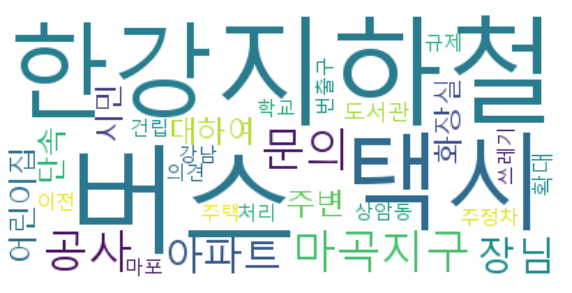

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

#### 워드 클라우드 매스크 사용형 생성:

In [14]:
# 백그라운드 마스크
#img = Image.open('background_1.png')                    # 타원형.
#img = Image.open('background_2.png')                   # 말풍선.
img = Image.open('background_3.png')                    # 하트.
back_mask = np.array(img)

In [15]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",background_color='white', max_words=30, mask=back_mask)            # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence) 

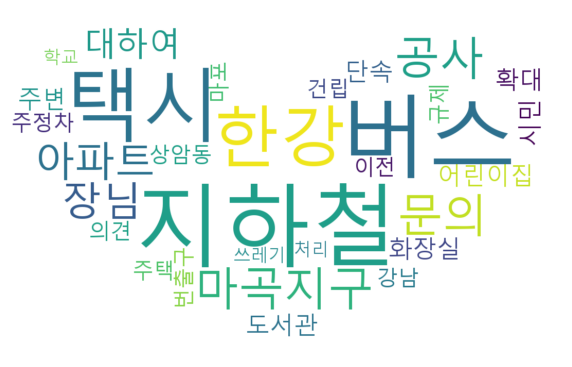

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()